# Analysis of Iowa Liquor Sales Data

### Overview:
This notebook delves into the Iowa Liquor Sales dataset to uncover trends and patterns in alcohol sales across the state. We'll explore various aspects such as sales over time, distribution across stores and counties, and details about popular brands and product preferences.

In [4]:
import pandas as pd 
df = pd.read_csv('Iowa_Liquor_Sales_Transformed.csv')

C:\Users\Adib\AppData\Local\Temp\ipykernel_16868\4073782771.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Iowa_Liquor_Sales_Transformed.csv')


## What are the top-selling liquor categories in Iowa?

**Top Selling Liquor Categories in Iowa (Bar Chart)**

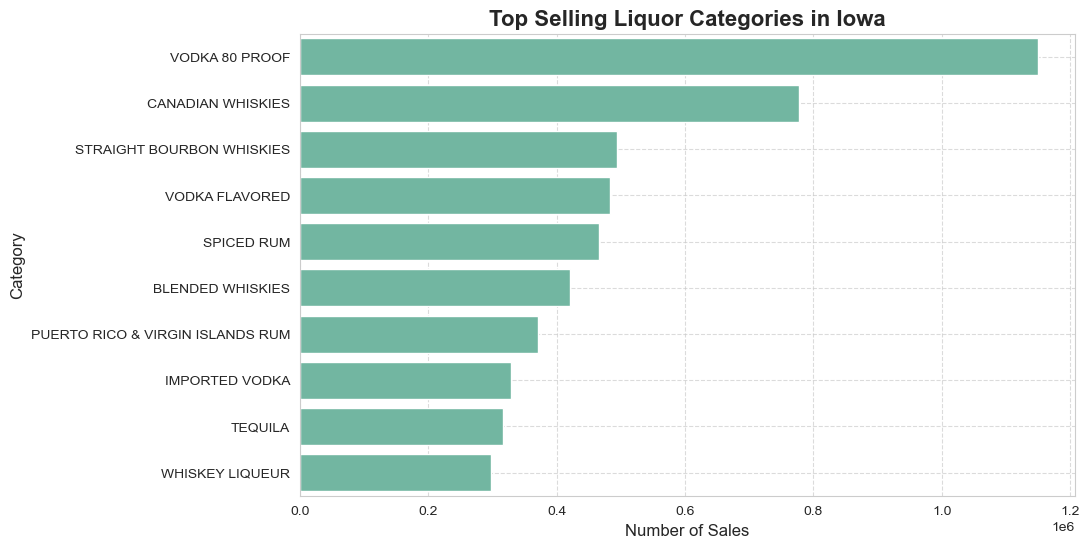

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
sns.set_palette("Set2")
# Set the style to "whitegrid" for a cleaner look
sns.set_style(style = "whitegrid")
# Assuming you have already defined the 'df' DataFrame
top_categories = df['Category Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
# Create the bar plot
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Top Selling Liquor Categories in Iowa', fontsize=16, fontweight='bold')
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


**Top Selling Liquor Categories in Iowa (Pie Chart)**

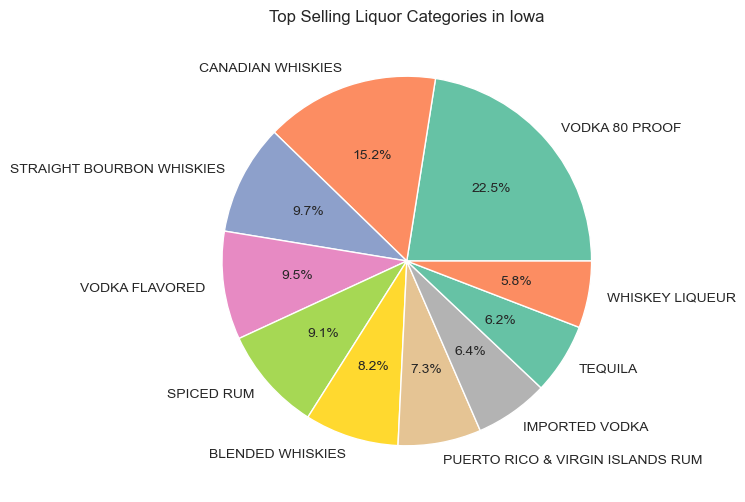

In [14]:
plt.figure(figsize=(10, 6))
top_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Selling Liquor Categories in Iowa')
plt.ylabel('')
plt.show()

## How do liquor sales vary by region and store location?

**Top 10 Counties by Liquor Sales in Iowa (Bar Chart)**

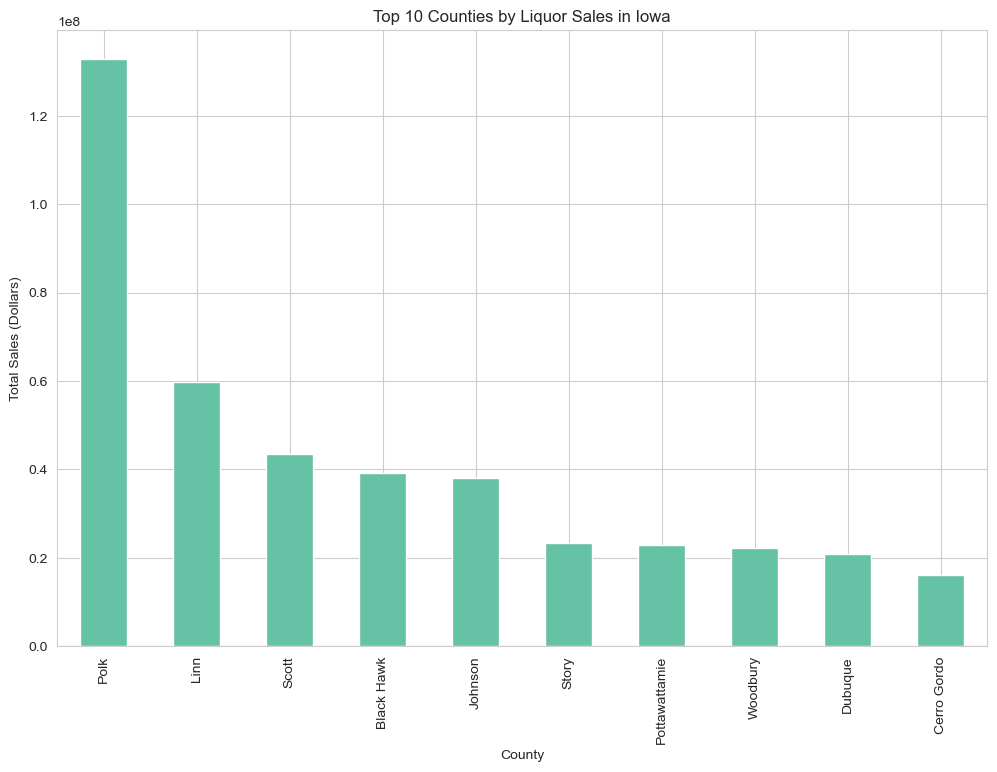

In [11]:
region_sales = df.groupby('County')['Sale (Dollars)'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
region_sales.head(10).plot(kind='bar')
plt.title('Top 10 Counties by Liquor Sales in Iowa')
plt.xlabel('County')
plt.ylabel('Total Sales (Dollars)')
plt.show()

## What are the peak sales periods for liquor in Iowa?

**Monthly Sales Trends in Iowa**

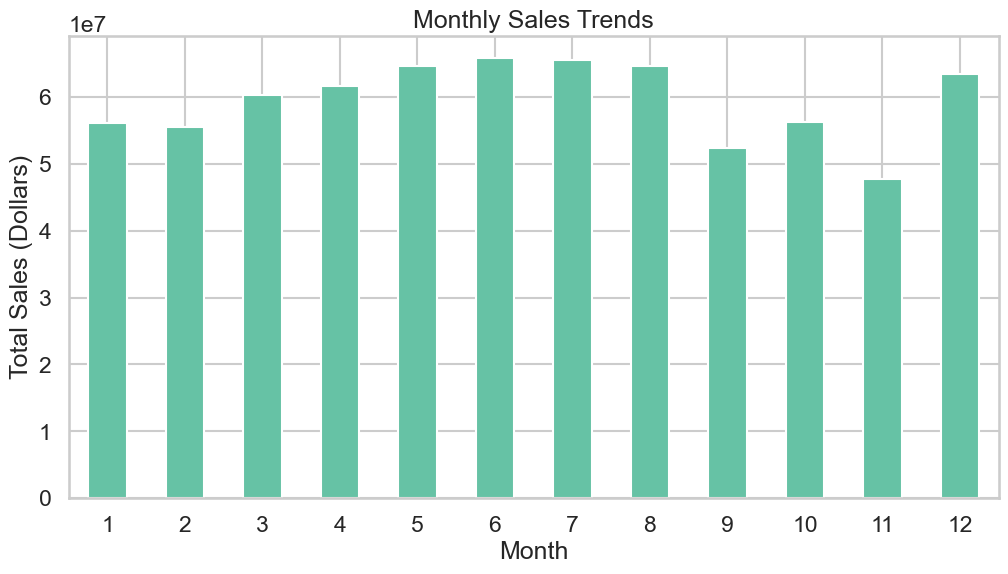

In [26]:
monthly_sales = df.groupby(df['Date'].dt.month)['Sale (Dollars)'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (Dollars)')
plt.xticks(ticks=range(len(monthly_sales)), labels=monthly_sales.index, rotation=0)  # Ensure month labels are correct
plt.show()

**Yearly Sales Trends in Iowa**

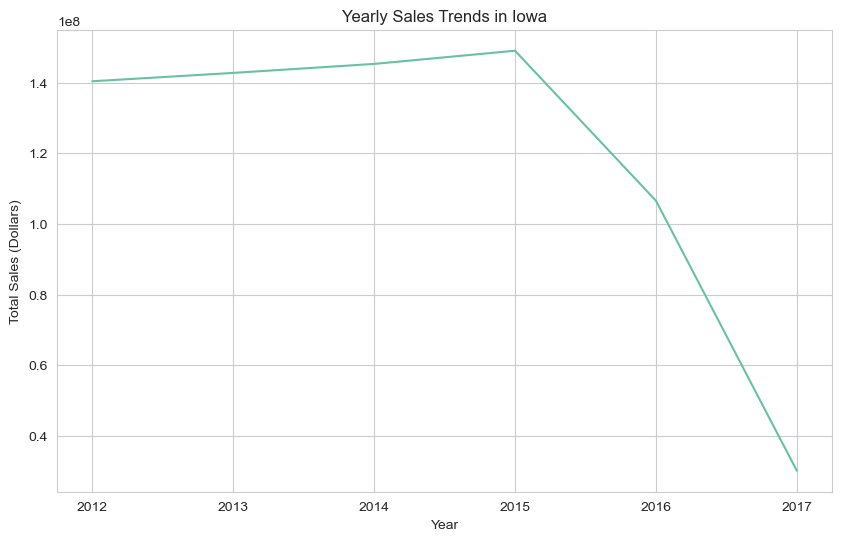

In [10]:
yearly_sales = df.groupby(df['Date'].dt.year)['Sale (Dollars)'].sum()
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line')
plt.title('Yearly Sales Trends in Iowa')
plt.xlabel('Year')
plt.ylabel('Total Sales (Dollars)')
plt.show()

## Is there a correlation between the type of liquor sold and the location of the store?

**Bar Charts of Top Liquor Categories by Location**

C:\Users\Adib\AppData\Local\Temp\ipykernel_2692\1549113554.py:29: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Location', y='Sale (Dollars)', hue='Category Name', data=combined_data, palette=palette)


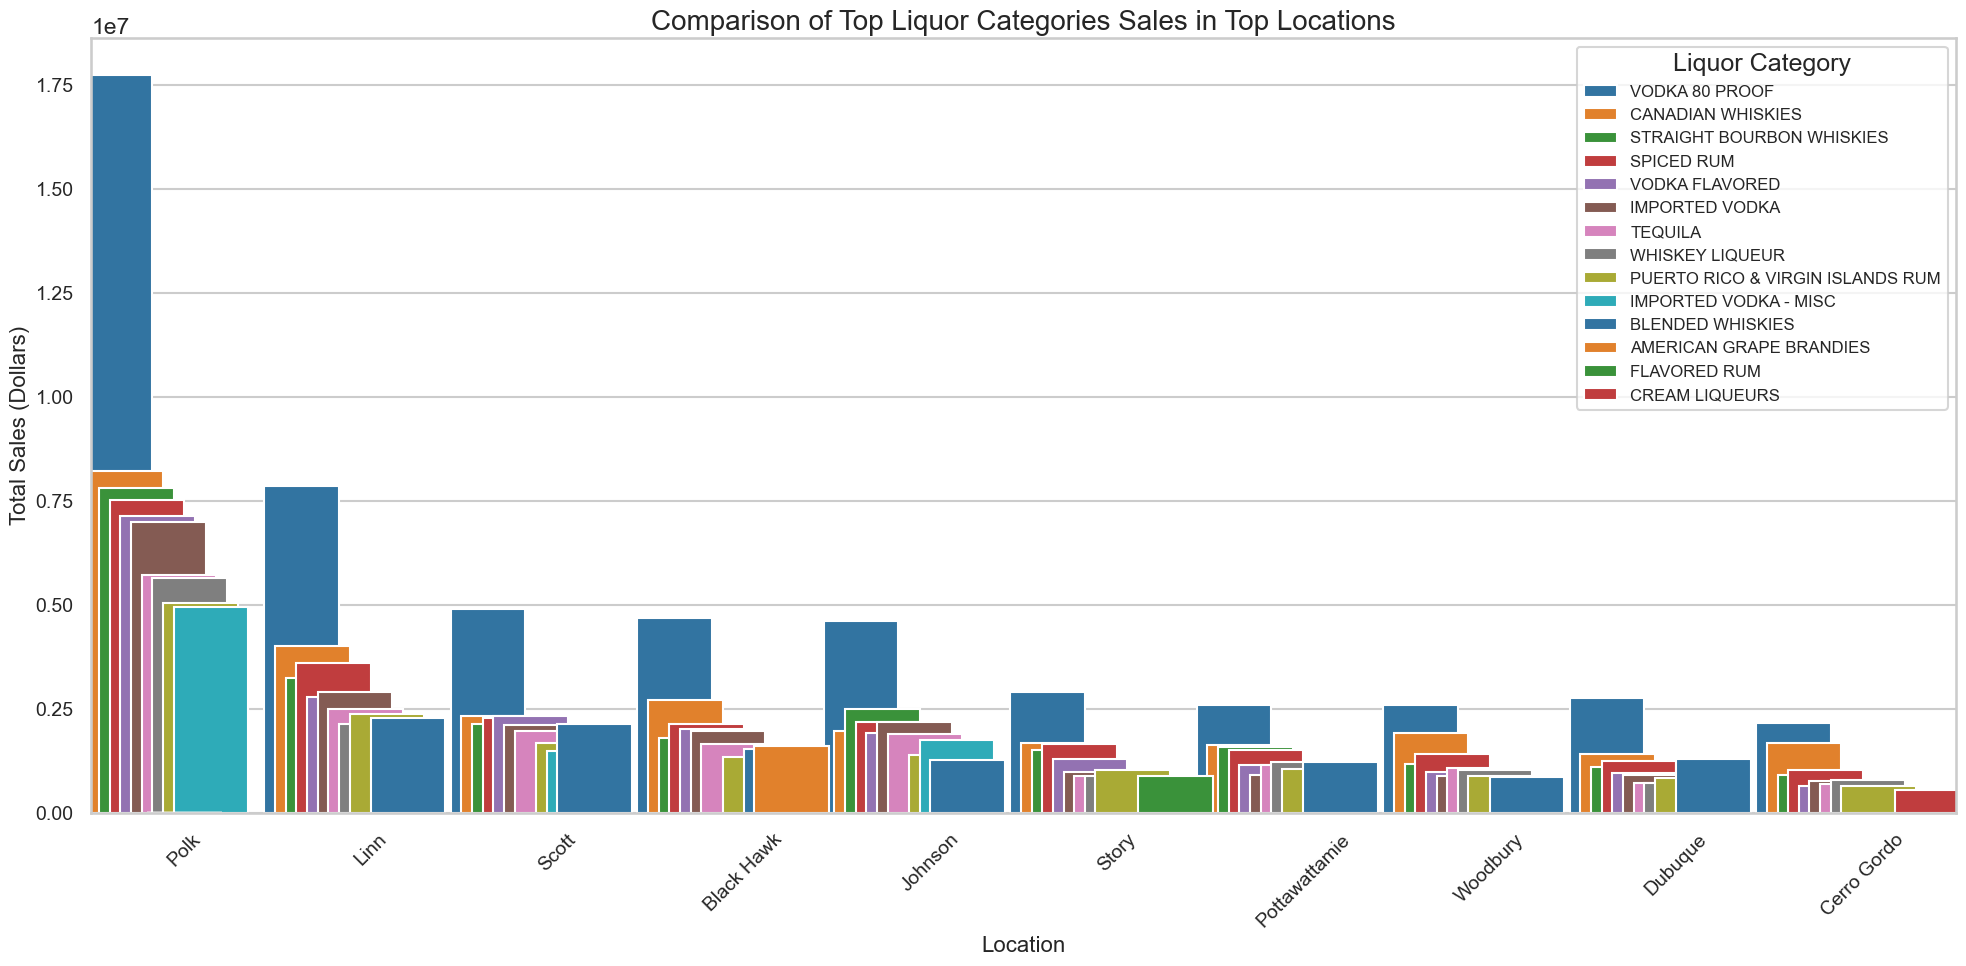

In [19]:
# Initialize an empty list to collect DataFrames
dataframes = []

for location in top_locations:
    subset = df[df['County'] == location]
    category_sales = subset.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending=False).head(10)
    
    # Create a DataFrame from the current location's data and add a column for the location
    temp_df = pd.DataFrame(category_sales).reset_index()
    temp_df['Location'] = location
    
    # Add the temporary DataFrame to our list
    dataframes.append(temp_df)

# Combine all the DataFrames in the list into a single DataFrame
combined_data = pd.concat(dataframes)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set context to "talk" for larger fonts and lines
sns.set_context("talk")

# Choose a different color palette
palette = sns.color_palette("tab10")  

# Plotting
plt.figure(figsize=(20, 10))  # Increase figure size
ax = sns.barplot(x='Location', y='Sale (Dollars)', hue='Category Name', data=combined_data, palette=palette)
plt.title('Comparison of Top Liquor Categories Sales in Top Locations', fontsize=20)
plt.xlabel('Location', fontsize=16)
plt.ylabel('Total Sales (Dollars)', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Place the legend inside the plot
ax.legend(title='Liquor Category', fontsize=12, loc='upper right')

# Adjust the width of the bars
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - 0.4 
    # Change the bar width
    patch.set_width(0.4)
    # Recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()


## What are the pricing trends for different types of liquor?

**Average Price per Liquor Category**

C:\Users\Adib\AppData\Local\Temp\ipykernel_2692\3464829420.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_prices.values, y=category_prices.index, palette="muted")


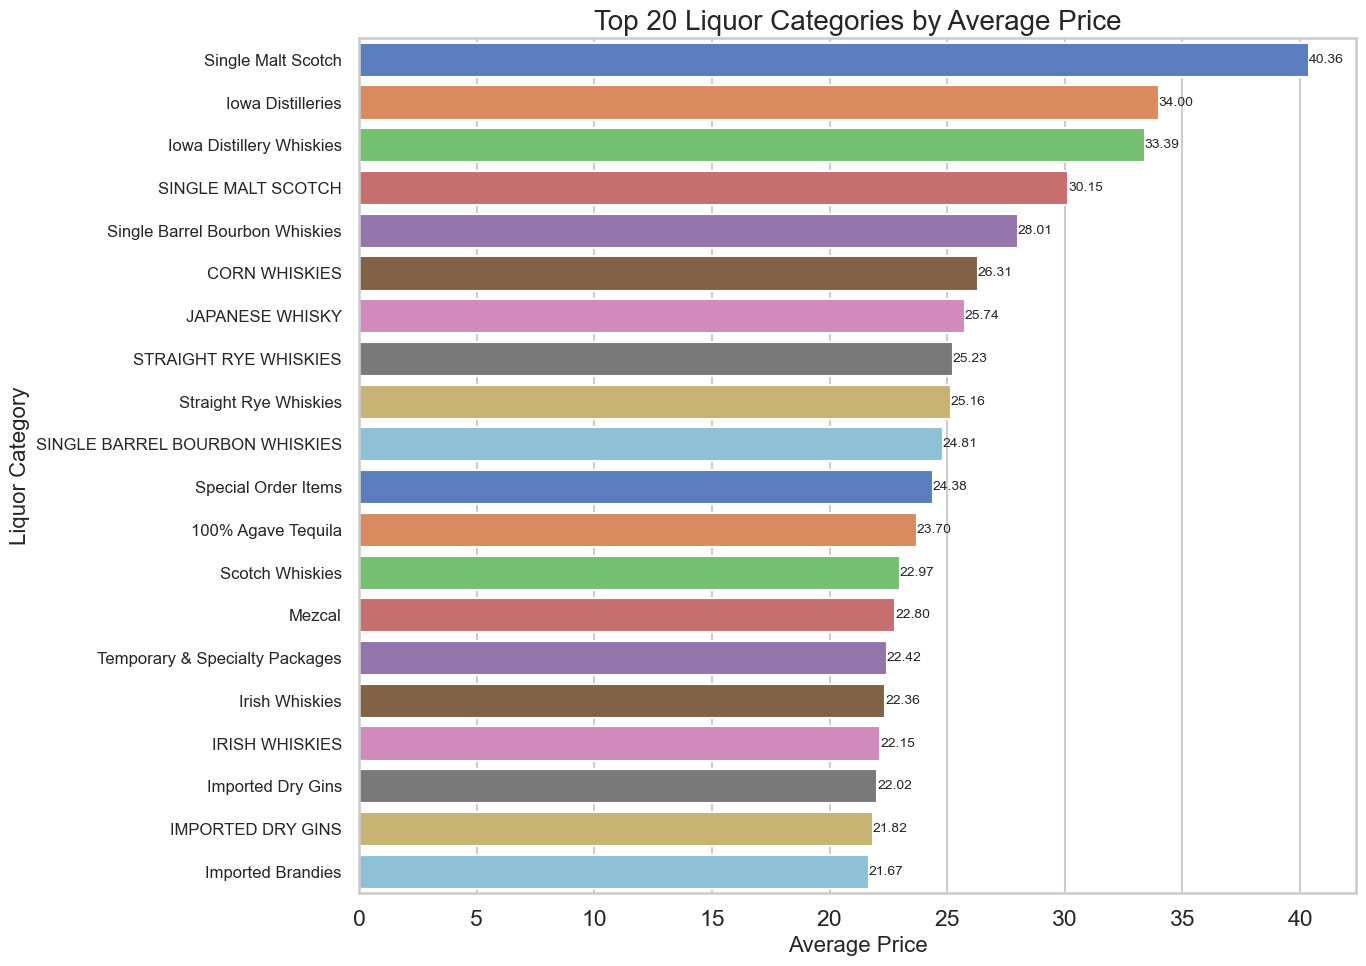

In [24]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate the average price per category and get the top 20
top_n = 20  # Number of categories to display
category_prices = df.groupby('Category Name')['State Bottle Retail'].mean().nlargest(top_n)

# Increase figure size for better visibility
plt.figure(figsize=(14, 10))

# Plot horizontal bar chart
sns.barplot(x=category_prices.values, y=category_prices.index, palette="muted")

# Add the title and labels with increased font size
plt.title('Top 20 Liquor Categories by Average Price', fontsize=20)
plt.xlabel('Average Price', fontsize=16)
plt.ylabel('Liquor Category', fontsize=16)

# Rotate the y-axis category labels for better readability if necessary
plt.yticks(fontsize=12)

# Add value labels to each bar for clarity
for index, value in enumerate(category_prices):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)  # Adjust fontsize as needed

# Show the plot with a tight layout to ensure everything fits well
plt.tight_layout()
plt.show()


## Are there any notable differences in sales patterns between counties?

**County-wise Sales Distribution**

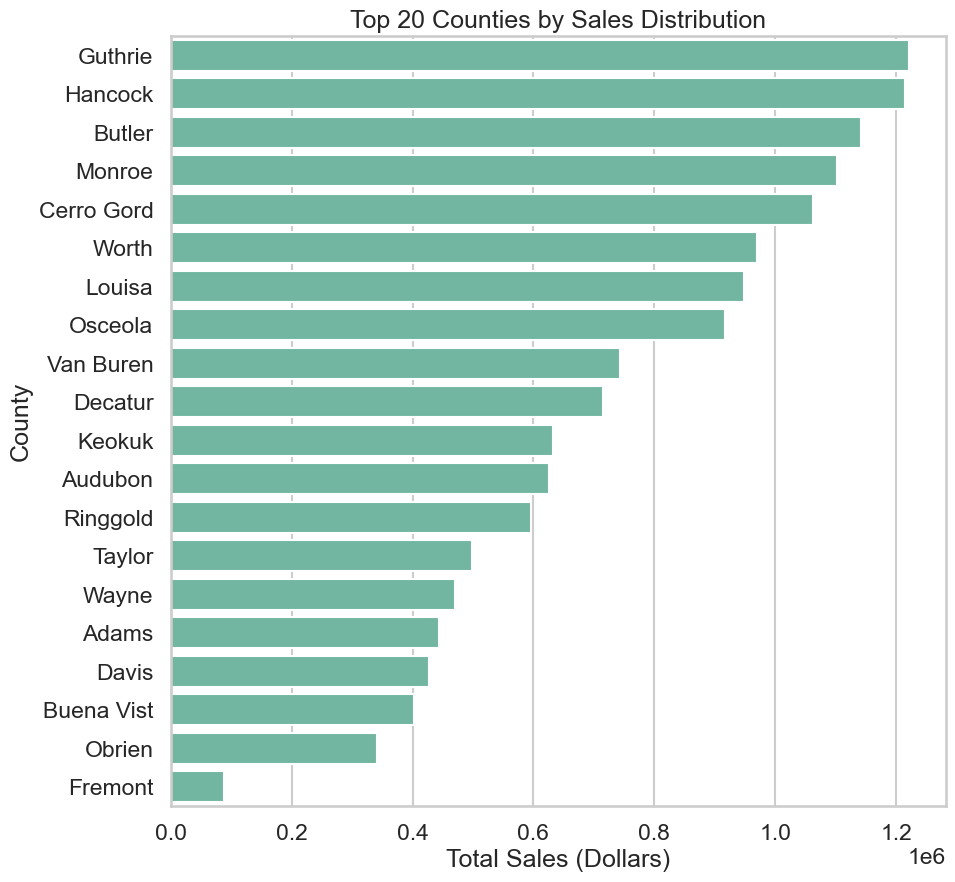

In [31]:
county_sales = df.groupby('County')['Sale (Dollars)'].sum()

# Choose the number of top counties you wish to display
top_n = 20

# Sort the counties by total sales and take the top N
sorted_county_sales = county_sales.sort_values(ascending=False).tail(top_n)

# Create a horizontal bar chart for the top N counties
plt.figure(figsize=(10, 10))  # Adjust the figure size to fit the top N counties
sns.barplot(x=sorted_county_sales.values, y=sorted_county_sales.index)
plt.title('Top 20 Counties by Sales Distribution')
plt.xlabel('Total Sales (Dollars)')
plt.ylabel('County')
plt.show()


**Violin Plot for the Top 20 Counties**

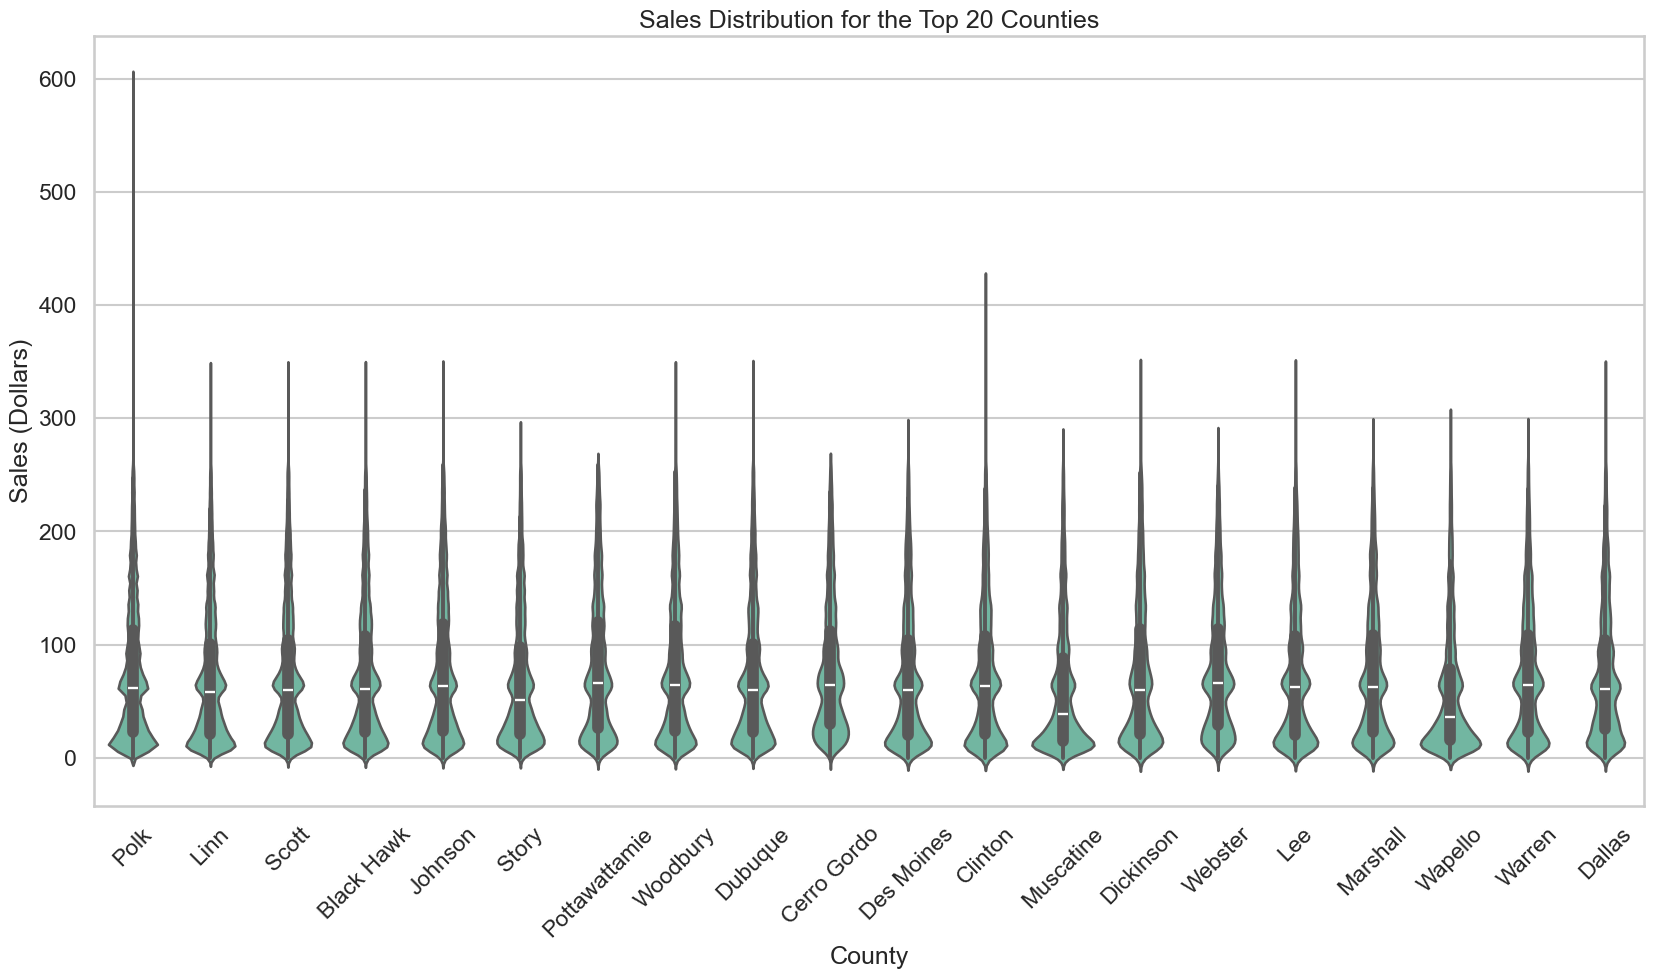

In [36]:
# Create a violin plot to show sales distribution by county for the top 20 counties
plt.figure(figsize=(20, 10))
sns.violinplot(data=top_counties_df, x='County', y='Sale (Dollars)', order=top_counties)
plt.title('Sales Distribution for the Top 20 Counties')
plt.xlabel('County')
plt.ylabel('Sales (Dollars)')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()


**Heatmap for Sales by County and Month/Year for the Top 20 Counties**

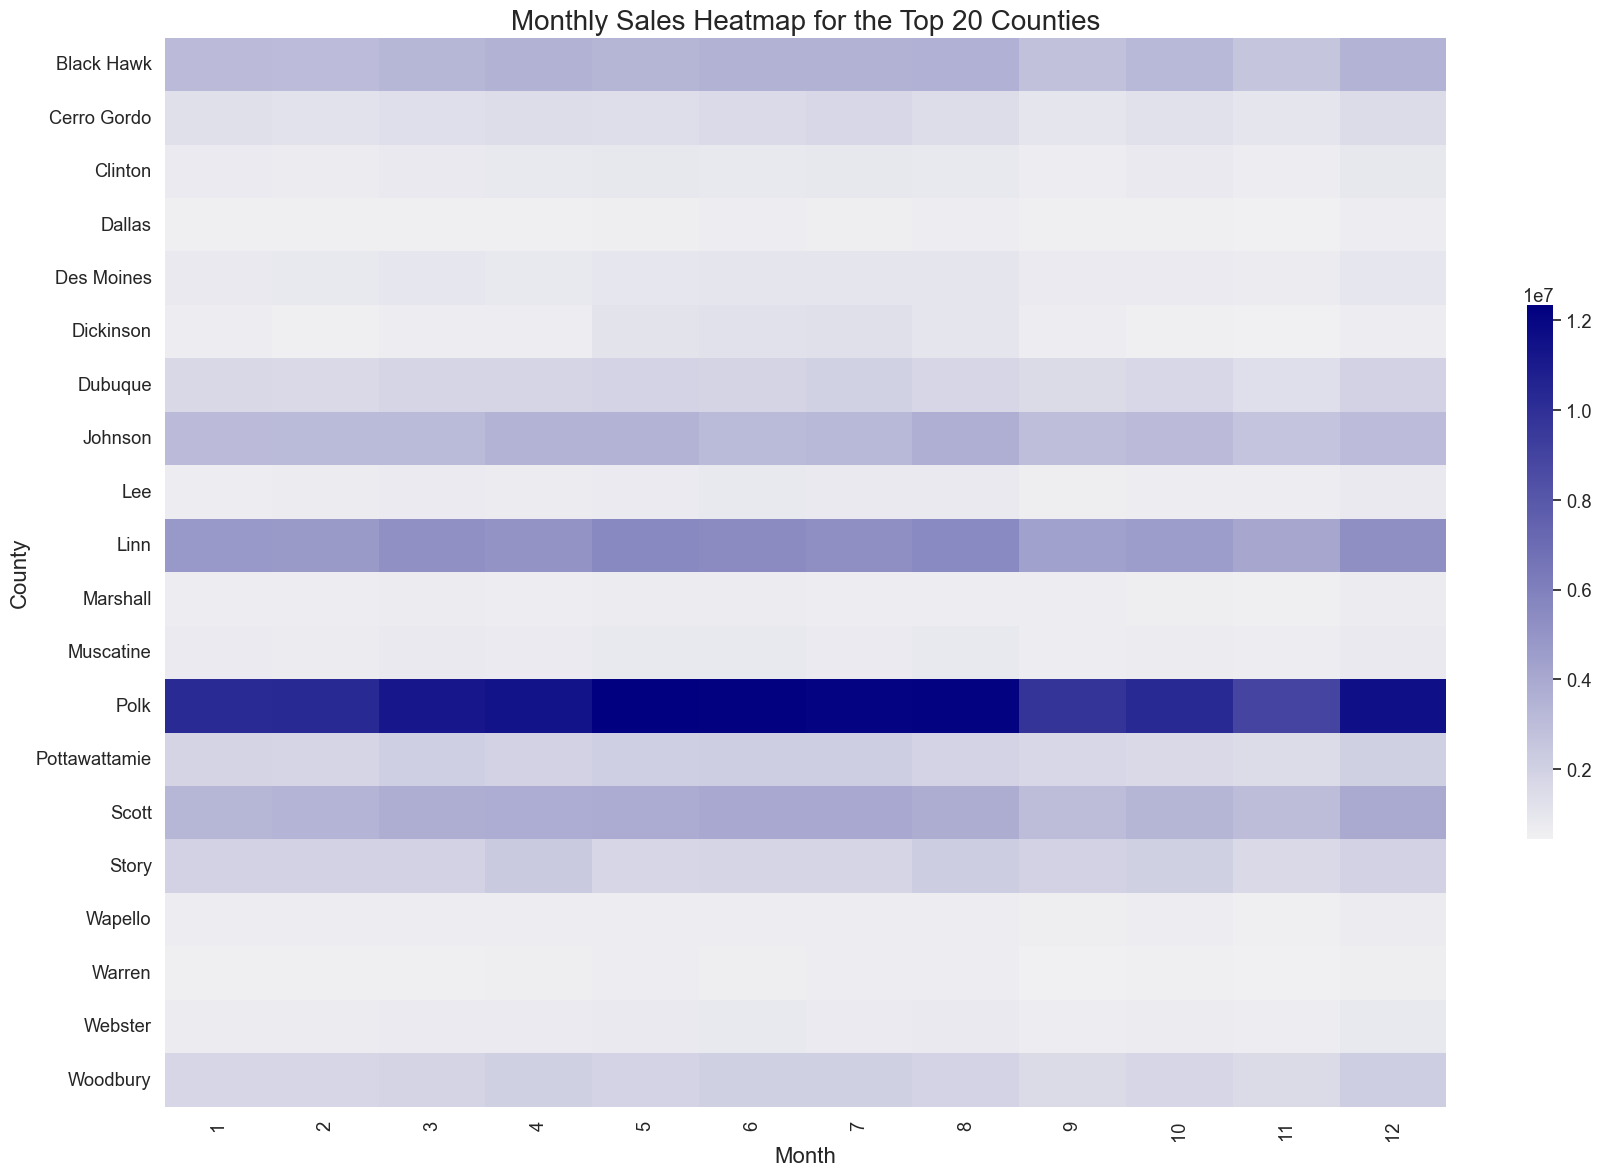

In [40]:
# Prepare data: sales by county and month for the top counties
top_sales_by_month_county = pd.pivot_table(data=top_counties_df, values='Sale (Dollars)', index='County', columns='Month', aggfunc='sum', fill_value=0)
# Select a simpler color palette
cmap = sns.light_palette("navy", as_cmap=True)
# Create the heatmap without annotations and with a specified figure size
plt.figure(figsize=(18, 12))  # Adjust the figure size to fit your display
# Plot the heatmap
sns.heatmap(top_sales_by_month_county, cmap=cmap, cbar_kws={"shrink": 0.5})

# Rotate the x-axis (month) labels for better readability
plt.xticks(rotation=90)

# Rotate the y-axis (county) labels for better readability
plt.yticks(rotation=0)

# Set the title and labels with increased font sizes for title and axis labels
plt.title('Monthly Sales Heatmap for the Top 20 Counties', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('County', fontsize=16)

# Show the plot with a tight layout to ensure everything fits well
plt.tight_layout()
plt.show()


## What is the distribution of alcohol sales across different store sizes?

**Sales Distribution by Store Size (Assuming Store Size Data Available)**

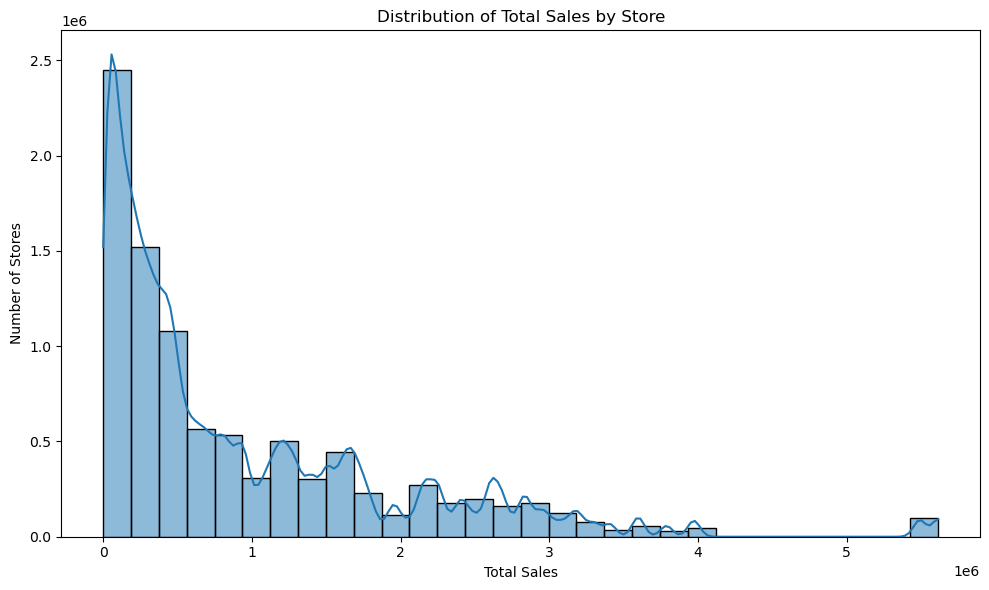

In [11]:
# Histogram of Total Sales by Store
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Sales by Store Location'], bins=30, kde=True)
plt.title('Distribution of Total Sales by Store')
plt.xlabel('Total Sales')
plt.ylabel('Number of Stores')
plt.tight_layout()  
plt.show()


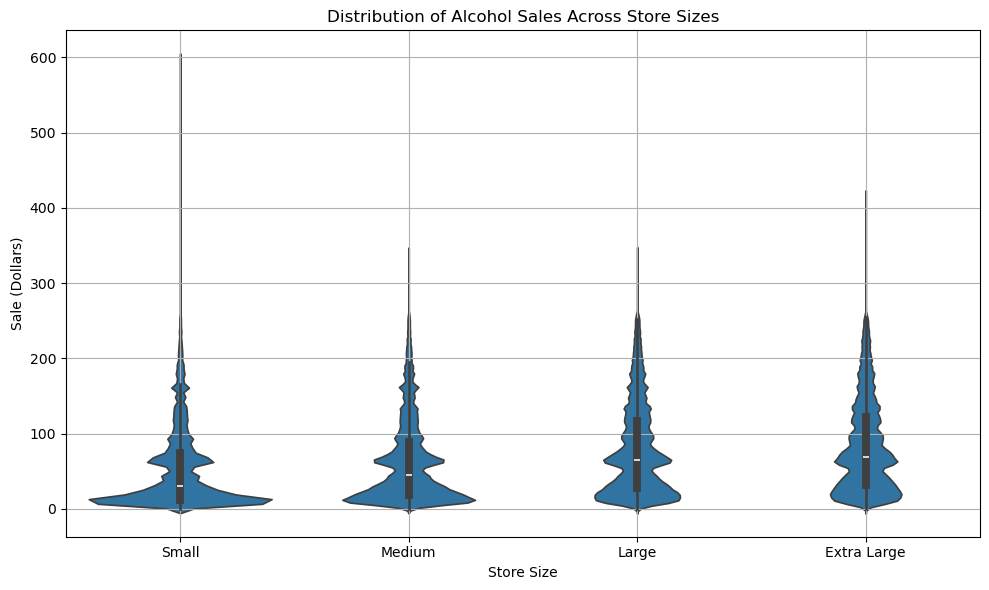

In [19]:
# Define store size categories based on quartiles of total sales
store_sizes = pd.qcut(df['Total Sales by Store Location'], q=4, labels=['Small', 'Medium', 'Large', 'Extra Large'])

# Add store size categories as a new column to the DataFrame
df['Store Size'] = store_sizes

# N# Alternatively, you could use a violin plot for a richer representation of the distributions
plt.figure(figsize=(10, 6))
sns.violinplot(x='Store Size', y='Sale (Dollars)', data=df)
plt.title('Distribution of Alcohol Sales Across Store Sizes')
plt.xlabel('Store Size')
plt.ylabel('Sale (Dollars)')
plt.tight_layout()  
plt.grid(True)
plt.show()

## How does legislative change or population growth affect the volume of alcohol sold in gallons over the years?

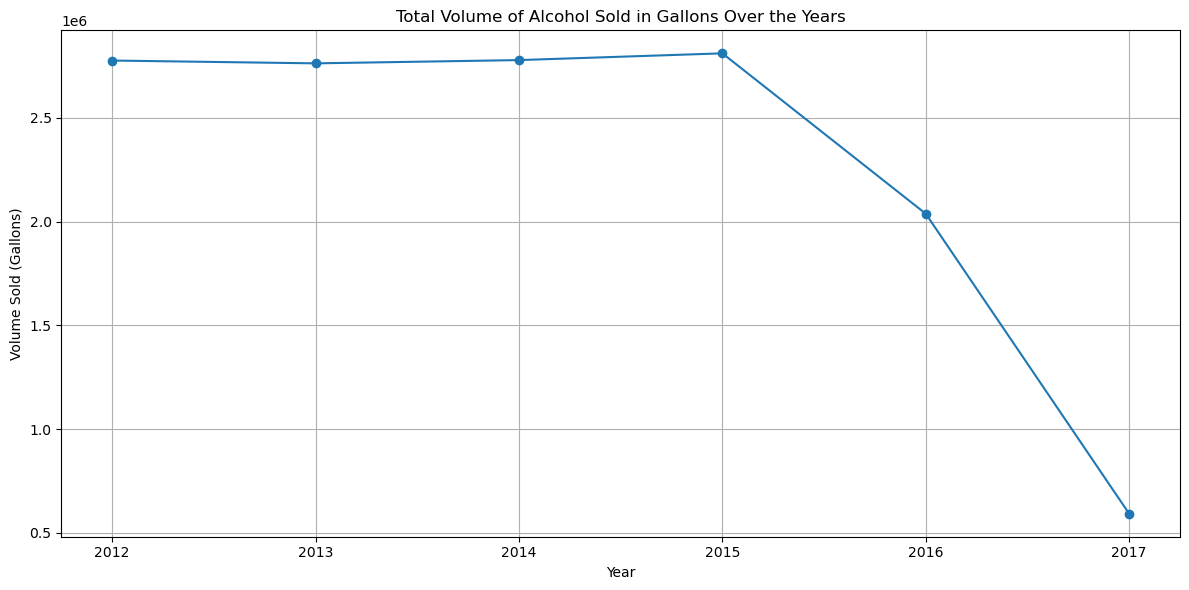

In [20]:
plt.figure(figsize=(12, 6))
df.groupby('Year')['Volume Sold (Gallons)'].sum().plot(kind='line', marker='o')
plt.title('Total Volume of Alcohol Sold in Gallons Over the Years')
plt.xlabel('Year')
plt.ylabel('Volume Sold (Gallons)')
plt.tight_layout()  
plt.grid(True)
plt.show()

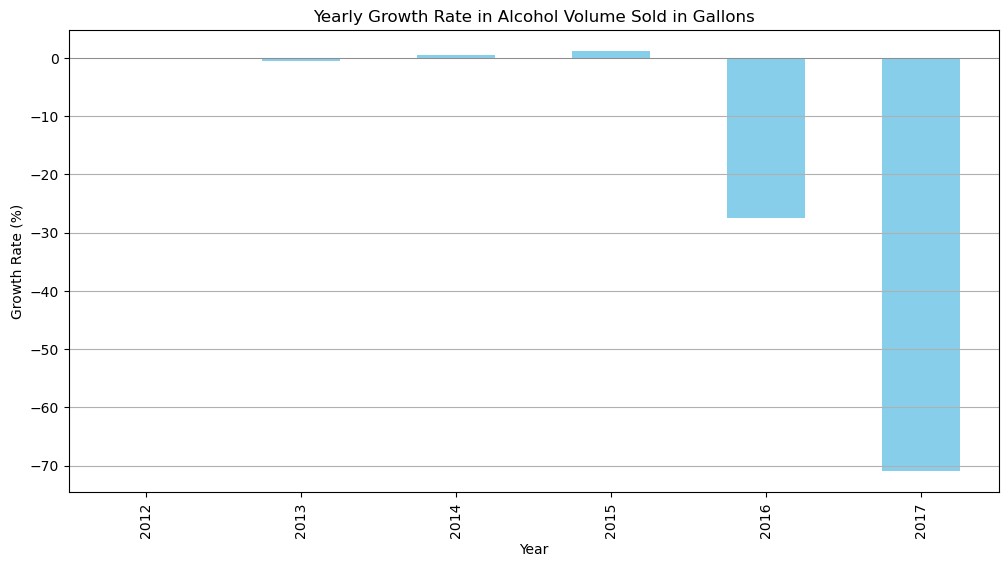

In [21]:
# Bar Chart of Yearly Growth Rate in Volume Sold
# First, calculate the yearly total volume
yearly_volume = df.groupby('Year')['Volume Sold (Gallons)'].sum()

# Then, calculate the year-over-year growth rate
yearly_growth_rate = yearly_volume.pct_change().mul(100)

plt.figure(figsize=(12, 6))
yearly_growth_rate.plot(kind='bar', color='skyblue')
plt.title('Yearly Growth Rate in Alcohol Volume Sold in Gallons')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='grey', linewidth=0.5)
plt.grid(axis='y')
plt.show()


## Is there a correlation between the type of liquor sold and the location of the store?

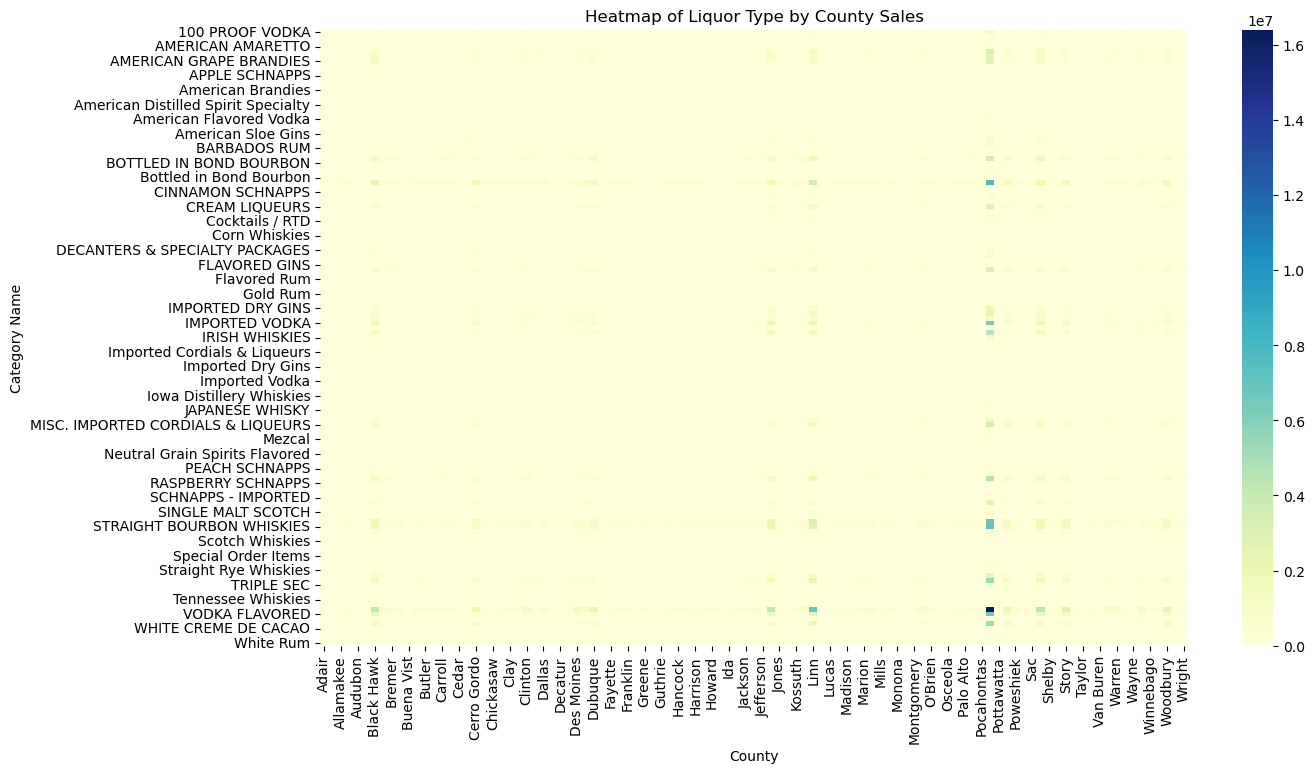

In [22]:
#Heatmap of Liquor Type by County Sales
pivot_table = df.pivot_table(index='Category Name', columns='County', values='Sale (Dollars)', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Liquor Type by County Sales')
plt.xlabel('County')
plt.ylabel('Category Name')
plt.show()


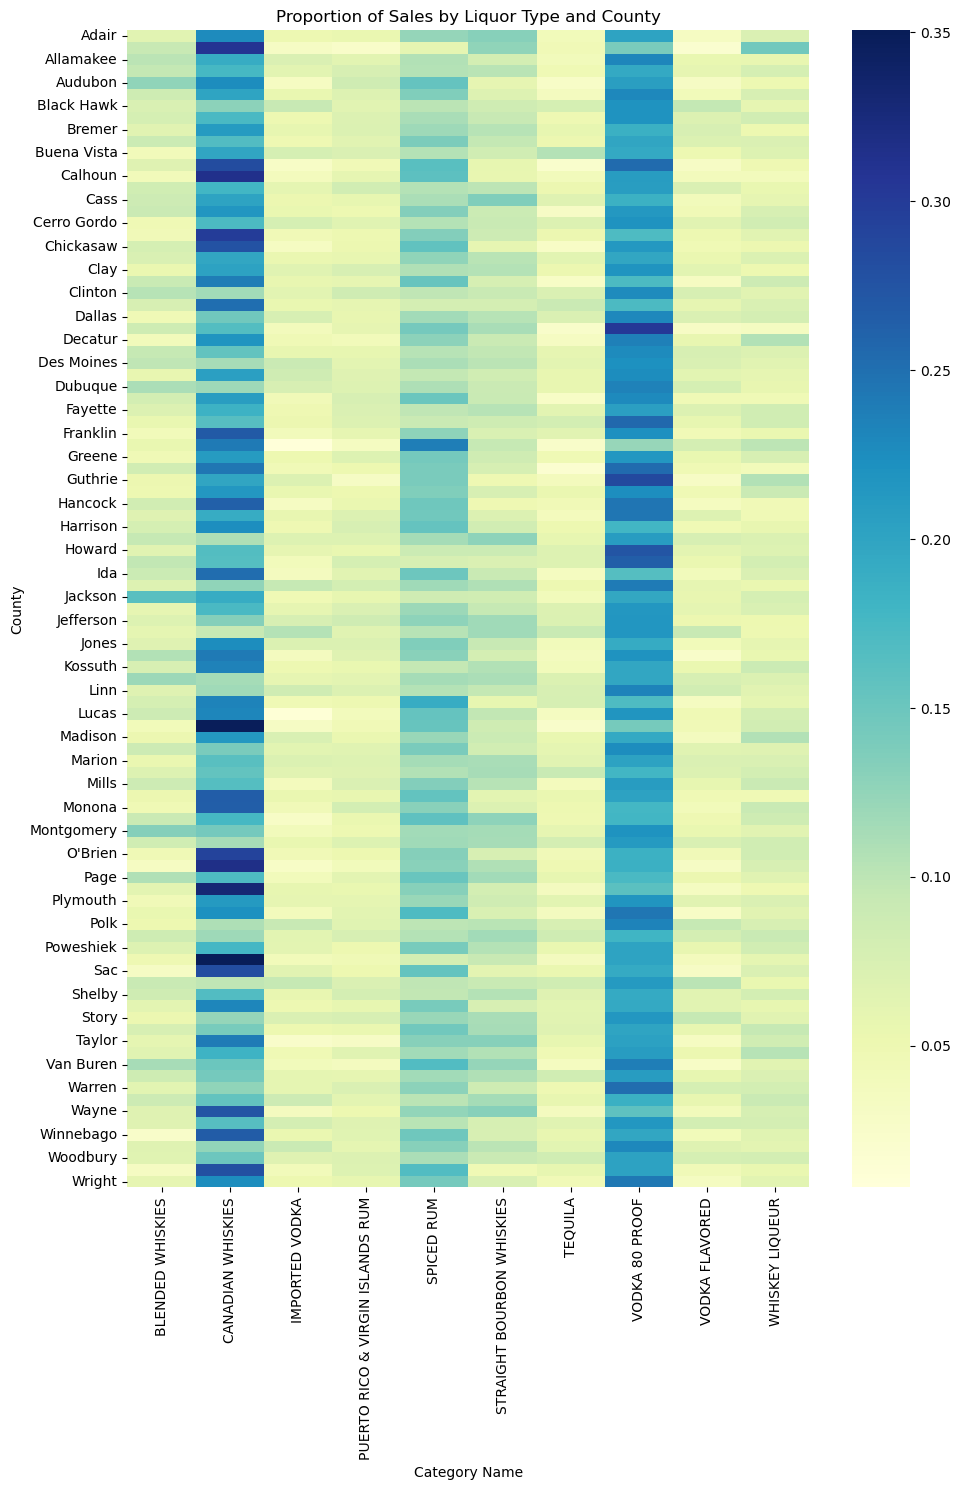

In [27]:
# We'll choose the top N categories by total sales for better readability in the heatmap
N = 10
top_categories = df.groupby('Category Name')['Sale (Dollars)'].sum().nlargest(N).index

# Filter the DataFrame for the top categories
top_categories_data = df[df['Category Name'].isin(top_categories)]

# Create a pivot table for the heatmap
pivot_table = top_categories_data.pivot_table(values='Sale (Dollars)', index='County', columns='Category Name', aggfunc='sum', fill_value=0)

# Normalize the pivot table by row to see the proportion of each category within each county
pivot_normalized = pivot_table.div(pivot_table.sum(axis=1), axis=0)

plt.figure(figsize=(10, 15))
sns.heatmap(pivot_normalized, cmap='YlGnBu', annot=False)
plt.title('Proportion of Sales by Liquor Type and County')
plt.xlabel('Category Name')
plt.tight_layout()  
plt.ylabel('County')
plt.show()


## What are the trends in liquor sales volume (in liters and gallons) over time in Iowa?

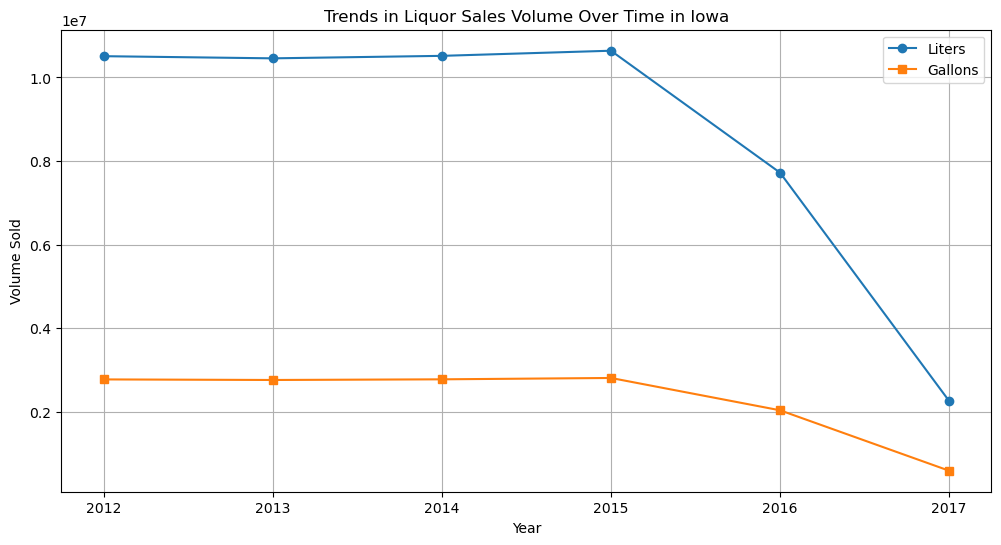

In [24]:
# Line Chart for Trends in Sales Volume
plt.figure(figsize=(12, 6))
df.groupby('Year')['Volume Sold (Liters)'].sum().plot(label='Liters', marker='o')
df.groupby('Year')['Volume Sold (Gallons)'].sum().plot(label='Gallons', marker='s')
plt.title('Trends in Liquor Sales Volume Over Time in Iowa')
plt.xlabel('Year')
plt.ylabel('Volume Sold')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Adib\AppData\Local\Temp\ipykernel_16868\2345090664.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Volume Sold (Gallons)', estimator='sum', ci=None)


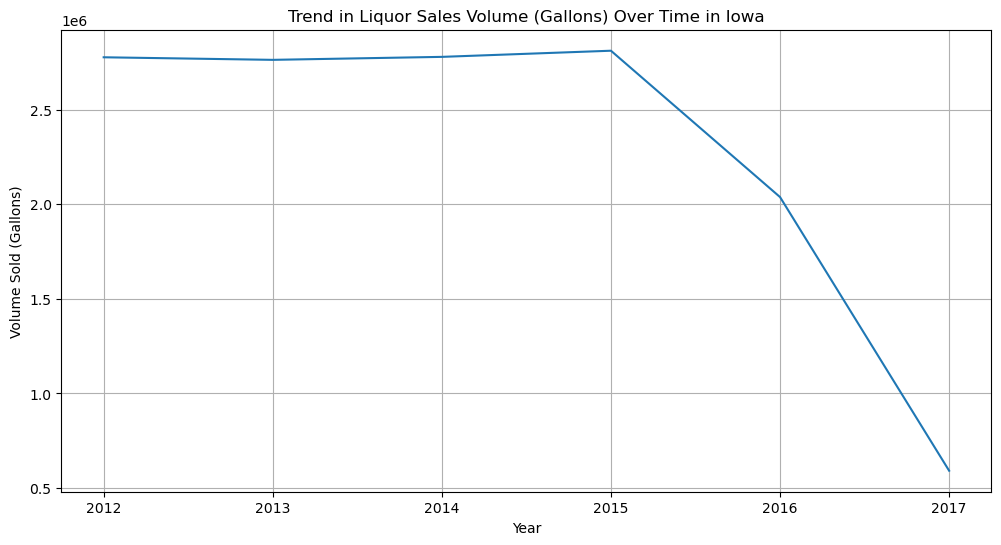

In [25]:
# Visualization 2: Trend in liquor sales volume in gallons over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Volume Sold (Gallons)', estimator='sum', ci=None)
plt.title('Trend in Liquor Sales Volume (Gallons) Over Time in Iowa')
plt.xlabel('Year')
plt.ylabel('Volume Sold (Gallons)')
plt.grid(True)
plt.show()